In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_df = pd.read_csv('../data/accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')

In [16]:
raw_df.columns = raw_df.columns.str.lower()

gpu_jobs_df = (raw_df
               .loc[raw_df['state'] == 'COMPLETED']
               .copy()
              )

gpu_jobs_df['reqtime'] = pd.to_timedelta(
    gpu_jobs_df['reqtime'].str.replace('-',' days ')
)

gpu_jobs_df['usedtime'] = pd.to_timedelta(
    gpu_jobs_df['usedtime'].str.replace('-',' days ')
)

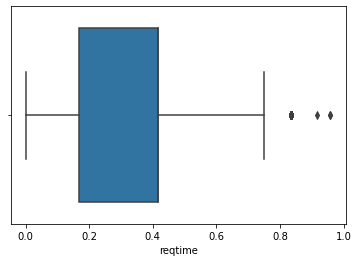

In [20]:
sns.boxplot(
    x = (gpu_jobs_df
         .loc[gpu_jobs_df['reqtime'] < np.timedelta64(1,'D')]['reqtime'] / np.timedelta64(1,'D')
        )
);

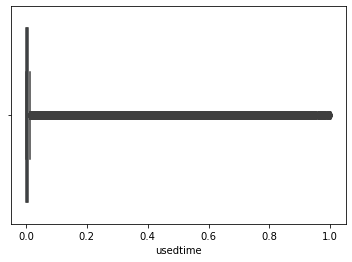

In [21]:
sns.boxplot(
    x = (gpu_jobs_df
         .loc[gpu_jobs_df['usedtime'] < np.timedelta64(1,'D')]['usedtime'] / np.timedelta64(1,'D')
        )
);

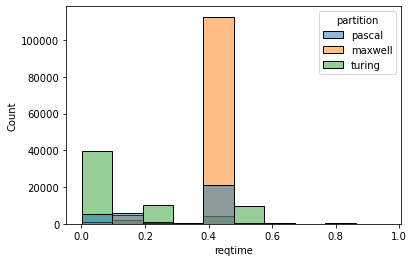

In [44]:
sns.histplot(
    x = (gpu_jobs_df
         .loc[gpu_jobs_df['reqtime'] < np.timedelta64(1,'D')]['reqtime'] / np.timedelta64(1,'D')
        ),
    hue = gpu_jobs_df['partition'],
    bins = 10
);

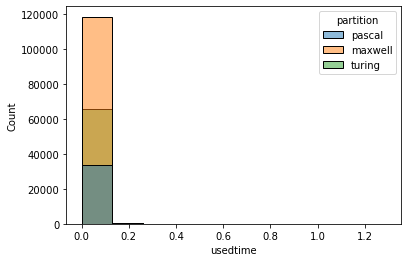

In [43]:
sns.histplot(
    x = (gpu_jobs_df
         .loc[gpu_jobs_df['reqtime'] < np.timedelta64(1,'D')]['usedtime'] / np.timedelta64(1,'D')
        ),
    hue = gpu_jobs_df['partition'],
    bins = 10
);

In [74]:
def used_percent(percent):
    for x in percent:
        used = gpu_jobs_df.loc[
            gpu_jobs_df['usedtime'] >= gpu_jobs_df['reqtime'] * x
        ]['jobid'].count()
    
        per = (used / gpu_jobs_df['jobid'].count() * 100).round(2)
    
        print(per)

In [91]:
percentages = [.9, .8, .7, .6, .01, .001, .0001]

used_percent(percentages)

1.27
1.5
1.75
2.05
27.8
77.96
98.26


In [148]:
def used_percent_per_day(day = None, percent = .9):
    values = []
    for x in percent:
        if day == None:
            used = gpu_jobs_df.loc[
                gpu_jobs_df['usedtime'] >= gpu_jobs_df['reqtime'] * x
            ]['jobid'].count()
            
            per = (used / gpu_jobs_df['jobid'].count() * 100).round(2)
        elif day == 0:
            used = gpu_jobs_df.loc[
                ((gpu_jobs_df['reqtime'] < np.timedelta64(1,'D')) &
                (gpu_jobs_df['usedtime'] >= gpu_jobs_df['reqtime'] * x)
                )
            ]['jobid'].count()
            
            per = (
                (used / gpu_jobs_df.loc[
                    gpu_jobs_df['reqtime'] < np.timedelta64(1,'D')
                ]['jobid'].count() * 100
                )
            ).round(2)
        elif 1 <= day <= 5:
            used = gpu_jobs_df.loc[
                ((gpu_jobs_df['reqtime'] >= np.timedelta64(day,'D')) &
                 (gpu_jobs_df['reqtime'] < np.timedelta64(day + 1,'D')) &
                (gpu_jobs_df['usedtime'] >= gpu_jobs_df['reqtime'] * x)
                )
            ]['jobid'].count()
            per = (
                (used / gpu_jobs_df.loc[
                    ((gpu_jobs_df['reqtime'] >= np.timedelta64(day,'D')) &
                     (gpu_jobs_df['reqtime'] < np.timedelta64(day + 1,'D'))
                    )
                ]['jobid'].count() * 100)
            ).round(2)
        else:
            used = gpu_jobs_df.loc[
                ((gpu_jobs_df['reqtime'] > np.timedelta64(5,'D')) &
                (gpu_jobs_df['usedtime'] >= gpu_jobs_df['reqtime'] * x)
                )
            ]['jobid'].count()
            
            per = (
                (used / gpu_jobs_df.loc[
                    gpu_jobs_df['reqtime'] > np.timedelta64(5,'D')
                ]['jobid'].count() * 100
                )
            ).round(2)
    
        values.append(per)
    return values

In [151]:
all_entires = used_percent_per_day(percent = percentages)
less_than_day = used_percent_per_day(day = 0, percent = percentages)
one_day = used_percent_per_day(day = 1, percent = percentages)
two_day = used_percent_per_day(day = 2, percent = percentages)
three_day = used_percent_per_day(day = 3, percent = percentages)
four_day = used_percent_per_day(day = 4, percent = percentages)
five_day = used_percent_per_day(day = 5, percent = percentages)
more_than_five = used_percent_per_day(day = 6, percent = percentages)